Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


### Exploring Data

In [3]:
variable_names = df.columns.tolist()
sample_size = df.shape
first_three_rows = df.head(3)
print("Dataset Summary")
print("\nVariable Names:")
print(variable_names)

print("\nSample Size (Rows, Columns):")
print(sample_size)

print("\nFirst Three Rows of the Data:")
first_three_rows

Dataset Summary

Variable Names:
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']

Sample Size (Rows, Columns):
(1453, 15)

First Three Rows of the Data:


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


The first respondent views McDonald's as not tasty, convenient, spicy, healthy, or greasy, and rates it poorly. The data shows that the perception variables are in verbal form (YES/NO), which isn't suitable for segmentation. To resolve this, the segmentation variables are extracted, converted from verbal to numeric binary format, and checked for accuracy by examining the average values of the transformed variables.

In [5]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never':0,'Once a year':1,'Every three months':4,'Once a month':12,'More than once a week':135,'Once a week':52})

In [11]:
df = df.replace({'Yes':1, 'No':0})

In [13]:
df['Like'] = df['Like'].replace({'I hate it!-5':-5,'I love it!+5':+5 })

In [15]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [16]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,52,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,12,1


In [17]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955,18.167928,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178,28.854783,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000,12.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000,12.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,135.000000,1.000000


<AxesSubplot:>

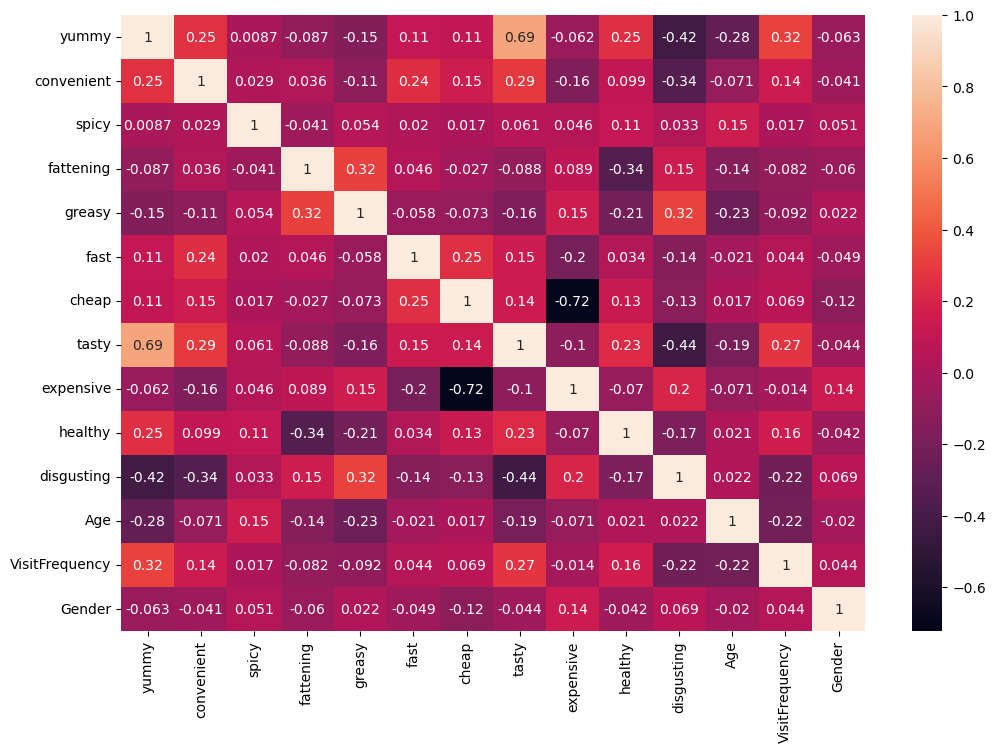

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [27]:
MD_x = df.iloc[:, :11]  # Select the first 11 columns


The transformed binary data shows that 55% of respondents find McDonald's yummy, 91% see it as convenient, and only 9% consider it spicy. Principal components analysis is used to create a perceptual map, which helps understand how attributes are rated and grouped. This analysis, unlike factor-cluster analysis, is employed to project and rotate the data, using unstandardized binary variables.

In [28]:
column_means = MD_x.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [29]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [30]:
pca_results = pd.DataFrame({
    'Standard deviation': pca.singular_values_,
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
})

In [32]:
pca_results.round(5)

,Standard deviation,Proportion of Variance,Cumulative Proportion
0,28.84746,0.29945,0.29945
1,23.14717,0.19280,0.49224
2,19.22858,0.13305,0.62529
3,15.19627,0.08310,0.70839
4,12.85686,0.05948,0.76787
5,11.82305,0.05030,0.81817
6,11.03895,0.04385,0.86201
7,10.48355,0.03955,0.90156
8,10.10742,0.03676,0.93832
9,9.48215,0.03235,0.97068


Results from principal components analysis indicate that the first two components
capture about 50% of the information contained in the segmentation variables.

In [33]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nStandard deviations:", np.round(pca.singular_values_, 1))
print("\nProportion of Variance:", np.round(explained_variance_ratio, 4))
print("\nCumulative Proportion:", np.round(cumulative_variance, 4))


Standard deviations: [28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]

Proportion of Variance: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative Proportion: [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [34]:
factor_loadings = pd.DataFrame(pca.components_.T, 
                               columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
                               index=MD_x.columns)

In [36]:
factor_loadings.round(6)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


In [38]:
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


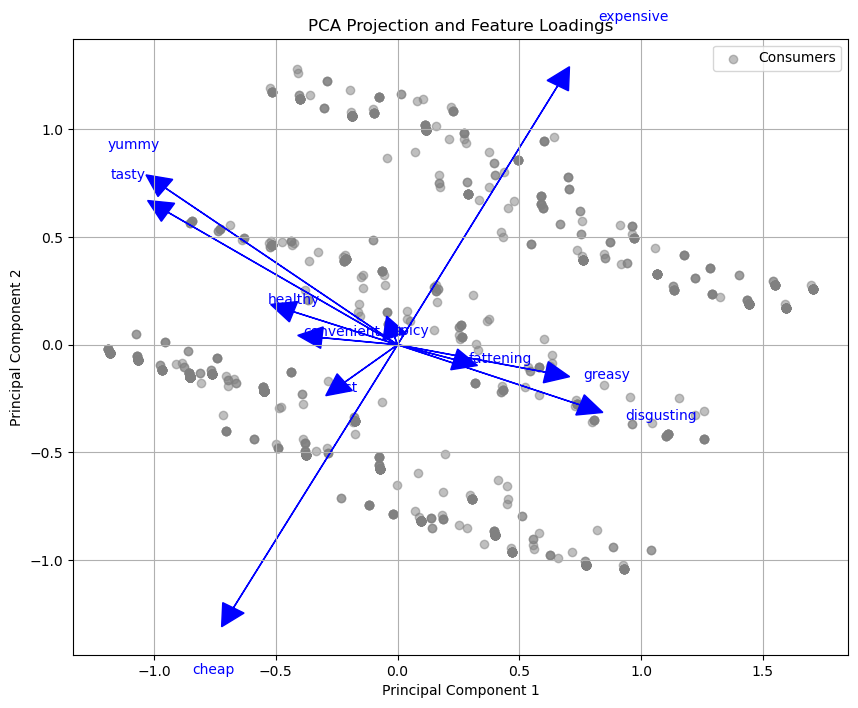

In [41]:
pca = PCA(n_components=2)  
MD_x_pca = pca.fit_transform(MD_x)
pca_df = pd.DataFrame(MD_x_pca, columns=['PC1', 'PC2'])

# Plot the projected data
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='grey', alpha=0.5, label='Consumers')

# Add arrows for original variables
for i, feature in enumerate(MD_x.columns):
    plt.arrow(0, 0, pca.components_[0, i]*2, pca.components_[1, i]*2,
              head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(pca.components_[0, i]*2.5, pca.components_[1, i]*2.5, feature, color='blue')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection and Feature Loadings')
plt.legend()
plt.grid(True)
plt.show()

presents a perceptual map where CHEAP and EXPENSIVE are key attributes evaluated independently of others. Attributes like FATTENING, DISGUSTING, and GREASY are grouped together, indicating a negative perception, while FAST, CONVENIENT, HEALTHY, TASTY, and YUMMY are associated with positive perceptions. Respondents' views on CHEAP versus EXPENSIVE cluster around three distinct groups: those favoring CHEAP, those favoring EXPENSIVE, and a middle group.

### Extracting Segments

segments are extracted using :

Standard k-means analysis – clusters data into distinct segments based on similarity.
Finite mixtures of binary distributions – models the data with binary outcomes to identify segments.

#### Using Kmeans

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
results = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    results[k] = kmeans

In [52]:
k = 3
kmeans_result = results[k]
labels = kmeans_result.labels_

In [53]:
print(f"Cluster centers for k={k}:")
print(kmeans_result.cluster_centers_)

Cluster centers for k=3:
[[0.84304207 0.98058252 0.08899676 0.80420712 0.36569579 0.96278317
  0.92880259 0.96440129 0.01779935 0.30420712 0.04045307]
 [0.81360947 0.95857988 0.12721893 0.90532544 0.62130178 0.86390533
  0.10059172 0.93786982 0.9112426  0.20710059 0.15680473]
 [0.01408451 0.78269618 0.07645875 0.9195171  0.66197183 0.84708249
  0.52716298 0.04627767 0.40442656 0.06237425 0.55331992]]


In [54]:
def relabel_clusters(cluster_labels, n_clusters):
    cluster_mapping = {}
    unique_labels = np.unique(cluster_labels)
    for i, label in enumerate(unique_labels):
        cluster_mapping[label] = i
    new_labels = np.array([cluster_mapping[label] for label in cluster_labels])
    return new_labels

relabelled_labels = relabel_clusters(labels, k)

print(f"Relabelled cluster labels for k={k}:")
print(relabelled_labels)

Relabelled cluster labels for k=3:
[2 1 1 ... 1 0 2]


In [57]:
wcss = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)

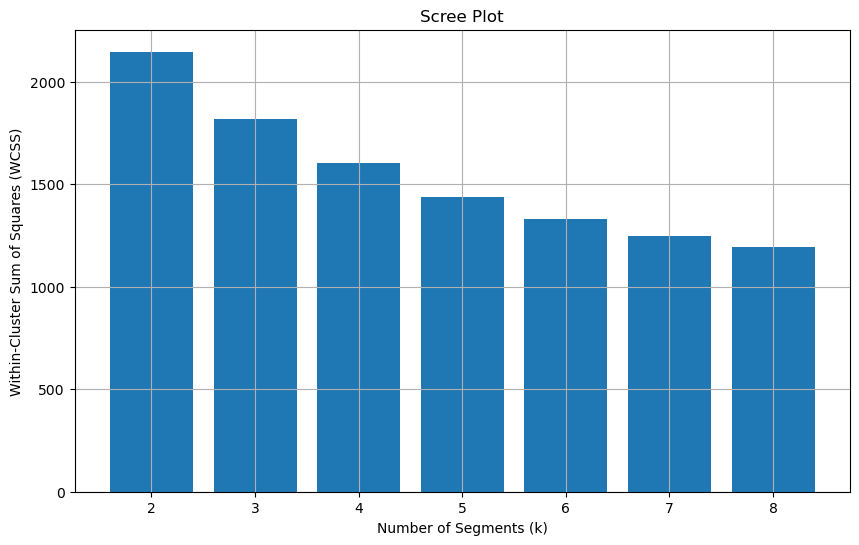

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(range(2, 9), wcss)
plt.xlabel('Number of Segments (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

 shows a gradual decline in the sum of distances within market segments without a clear elbow, making it unhelpful for determining the number of segments. Instead, stability-based data structure analysis is used to assess whether segments naturally occur or need to be artificially created. This method evaluates the consistency of segmentation solutions across multiple replications to ensure reliable and stable results, avoiding random or unstable segmentations.

In [59]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

Global stability measures how consistently the same segmentation solution appears when the analysis is repeated with bootstrap samples of the data. It is assessed by applying k-means clustering to multiple bootstrap samples (e.g., 2 × 100) and performing multiple random initializations (e.g., ten) for each number of segments (between two and eight). This approach ensures that the segmentation solution is stable and reliable.

In [61]:
def bootstrap_samples(data, n_samples):
    """Generate bootstrap samples from the dataset."""
    return [resample(data, replace=True) for _ in range(n_samples)]

n_boot = 100
bootstrap_data = bootstrap_samples(MD_x_pca, n_boot)

In [62]:
def run_kmeans_on_bootstraps(data, cluster_range, n_rep):
    """Run k-means clustering on bootstrap samples and compute stability."""
    stability_results = {k: [] for k in cluster_range}

    for sample in data:
        for n_clusters in cluster_range:
            kmeans_runs = [KMeans(n_clusters=n_clusters, n_init=10, random_state=i).fit(sample) for i in range(n_rep)]
            labels_list = [kmeans.labels_ for kmeans in kmeans_runs]
            pairwise_ari_scores = [adjusted_rand_score(labels_list[i], labels_list[j])
                                   for i in range(len(labels_list))
                                   for j in range(i + 1, len(labels_list))]
            
            avg_ari = np.mean(pairwise_ari_scores)
            stability_results[n_clusters].append(avg_ari)

    return stability_results

stability_results = run_kmeans_on_bootstraps(bootstrap_data, range(2, 9), 10)

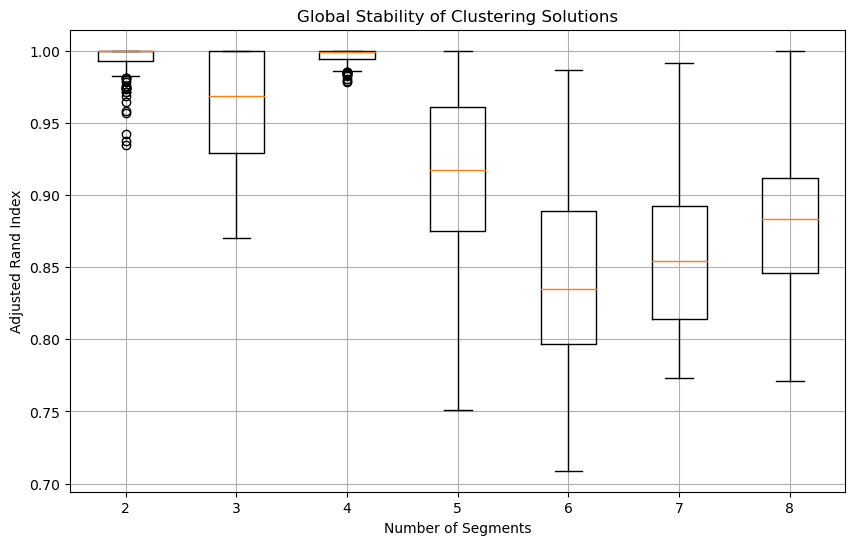

In [63]:
cluster_numbers = list(stability_results.keys())
stability_scores = [stability_results[k] for k in cluster_numbers]

plt.figure(figsize=(10, 6))
plt.boxplot(stability_scores, labels=cluster_numbers)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Clustering Solutions')
plt.grid(True)
plt.show()

 shows the distribution of stability for different numbers of segments using vertical boxplots, with higher stability being preferable. The two-, three-, and four-segment solutions are relatively stable, but the two- and three-segment solutions lack detailed market insights. Increasing to five segments results in a significant drop in average stability. Therefore, the four-segment solution is identified as the optimal choice, offering a balance between stability and market insight.








In [65]:
from sklearn.mixture import GaussianMixture

In [66]:
n_components = range(2, 9)
models = [GaussianMixture(n, random_state=1234).fit(MD_pca) for n in n_components]

# Extract AIC, BIC, and log-likelihood for each model
aic = [model.aic(MD_pca) for model in models]
bic = [model.bic(MD_pca) for model in models]
log_likelihood = [model.lower_bound_ for model in models]

# Create a DataFrame to hold the information criteria
criteria_df = pd.DataFrame({'n_components': n_components, 'AIC': aic, 'BIC': bic, 'Log Likelihood': log_likelihood})

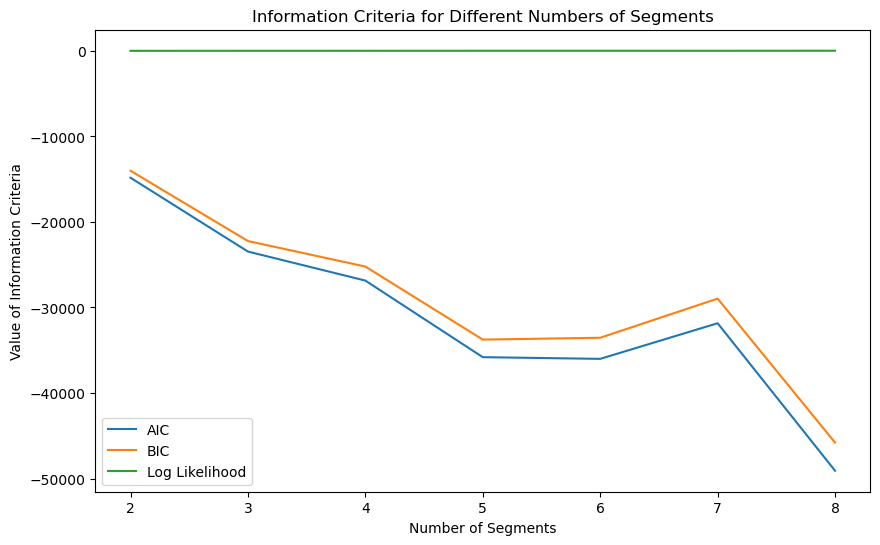

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, log_likelihood, label='Log Likelihood')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Different Numbers of Segments')
plt.legend()
plt.show()

### Profiling Segments

With the segmentation analysis complete, the next step is to interpret the four-segment k-means solution. This involves creating a segment profile plot, which highlights key characteristics and differences between segments. To enhance interpretability, similar attributes are grouped together using hierarchical cluster analysis. This approach clusters attributes based on their similarity, making it easier to visualize and understand the profile of each market segment.

In [76]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(MD_x)

C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [77]:
final_labels = kmeans.labels_
final_labels

array([2, 0, 0, ..., 0, 1, 3])

In [79]:
MD_x['cluster'] = final_labels

In [80]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,3
1449,1,1,0,1,0,0,1,1,0,1,0,1
1450,1,1,0,1,0,1,0,1,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,1


In [82]:
segement_profile = MD_x.groupby("cluster").aggregate('mean')


In [83]:
len(segement_profile.columns)


11

<Figure size 3000x3000 with 0 Axes>

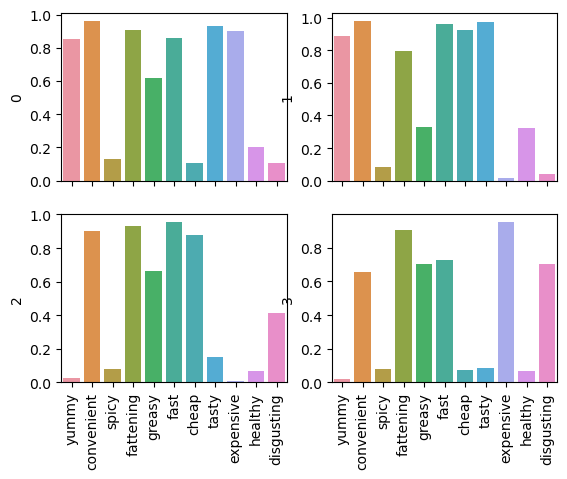

<Figure size 3000x3000 with 0 Axes>

In [84]:
fig,axes = plt.subplots(2,2,sharex=True)
fig1 = sns.barplot(x=segement_profile.iloc[0].index, y=segement_profile.iloc[0],ax=axes[0,0])
fig1.set_xticklabels(segement_profile.columns, rotation='vertical')
fig2 = sns.barplot(x=segement_profile.iloc[1].index, y=segement_profile.iloc[1],ax=axes[0,1])
fig2.set_xticklabels(segement_profile.columns, rotation='vertical')
fig3 = sns.barplot(x=segement_profile.iloc[2].index, y=segement_profile.iloc[2],ax=axes[1,0])
fig3.set_xticklabels(segement_profile.columns, rotation='vertical')
fig4 = sns.barplot(x=segement_profile.iloc[3].index, y=segement_profile.iloc[3],ax=axes[1,1])
fig4.set_xticklabels(segement_profile.columns, rotation='vertical')
plt.figure(figsize=(30,30))

Text(0, 0.5, 'PC2')

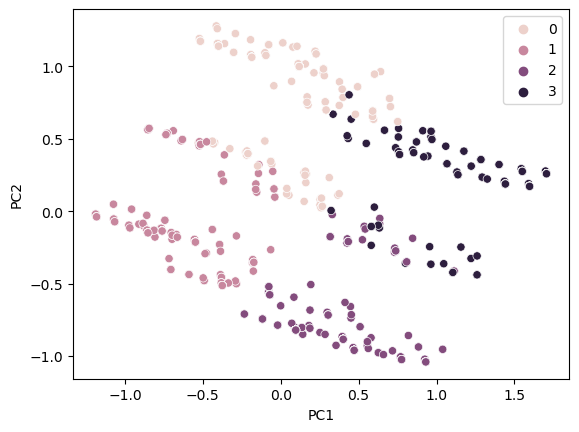

In [86]:
sns.scatterplot(x=MD_x_pca[:,0],y=MD_x_pca[:,1],hue=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")

### Describing Segments

To visualize the association between segment membership and consumers' feelings toward McDonald's, we'll use a mosaic plot. This plot will help illustrate how different segments relate to whether consumers love or hate McDonald's.

Here’s the process:

Extract Segment Membership: Obtain the segment membership for each consumer based on the four-segment solution.
Cross-Tabulate Data: Create a cross-tabulation of segment membership and the love/hate variable.
Generate Mosaic Plot: Create a mosaic plot where cell colors indicate deviations from expected frequencies if the variables were independent.

In [87]:
MD_x['Like']=df['Like']
MD_x['Gender']=df['Gender']
MD_x['Age']=df['Age']
MD_x['VisitFrequency']=df['VisitFrequency']

In [88]:
from statsmodels.graphics.mosaicplot import mosaic


shows a clear association between segment membership and consumer sentiment towards McDonald’s. Segment 1 members rarely love McDonald’s, with red boxes indicating low love and high dislike. Conversely, Segment 4 members are much more likely to love McDonald’s, with dark blue boxes showing high love and minimal dislike. Segment 2 members exhibit the strongest negative sentiment, with dark red boxes indicating a high likelihood of hating McDonald’s.

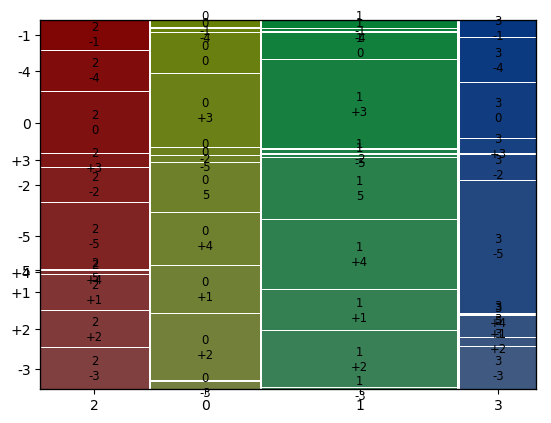

In [90]:
fig =mosaic(MD_x,['cluster','Like'])


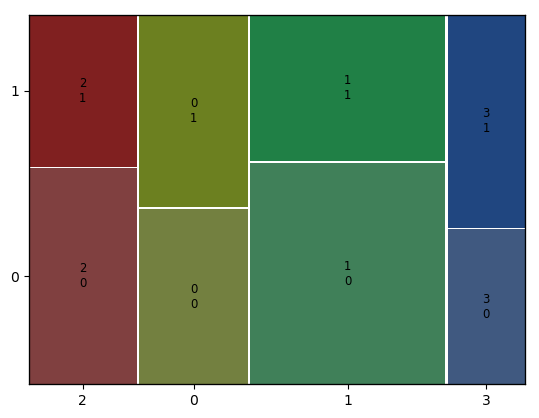

In [91]:
fig =mosaic(MD_x,['cluster','Gender'])


<AxesSubplot:xlabel='cluster', ylabel='Age'>

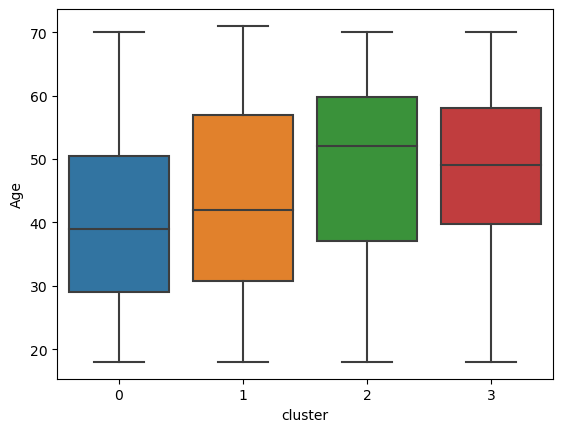

In [92]:
sns.boxplot(x=MD_x['cluster'],y=MD_x['Age'])


In [94]:
from sklearn.tree import DecisionTreeClassifier
X_new=MD_x.iloc[:,11:].replace(to_replace=(0,1,2),value=0)
X_train=MD_x.drop('cluster',axis=1)
X_train=pd.get_dummies(X_train,drop_first=True)
y_train=X_new['cluster']

### Selecting The Target Segment

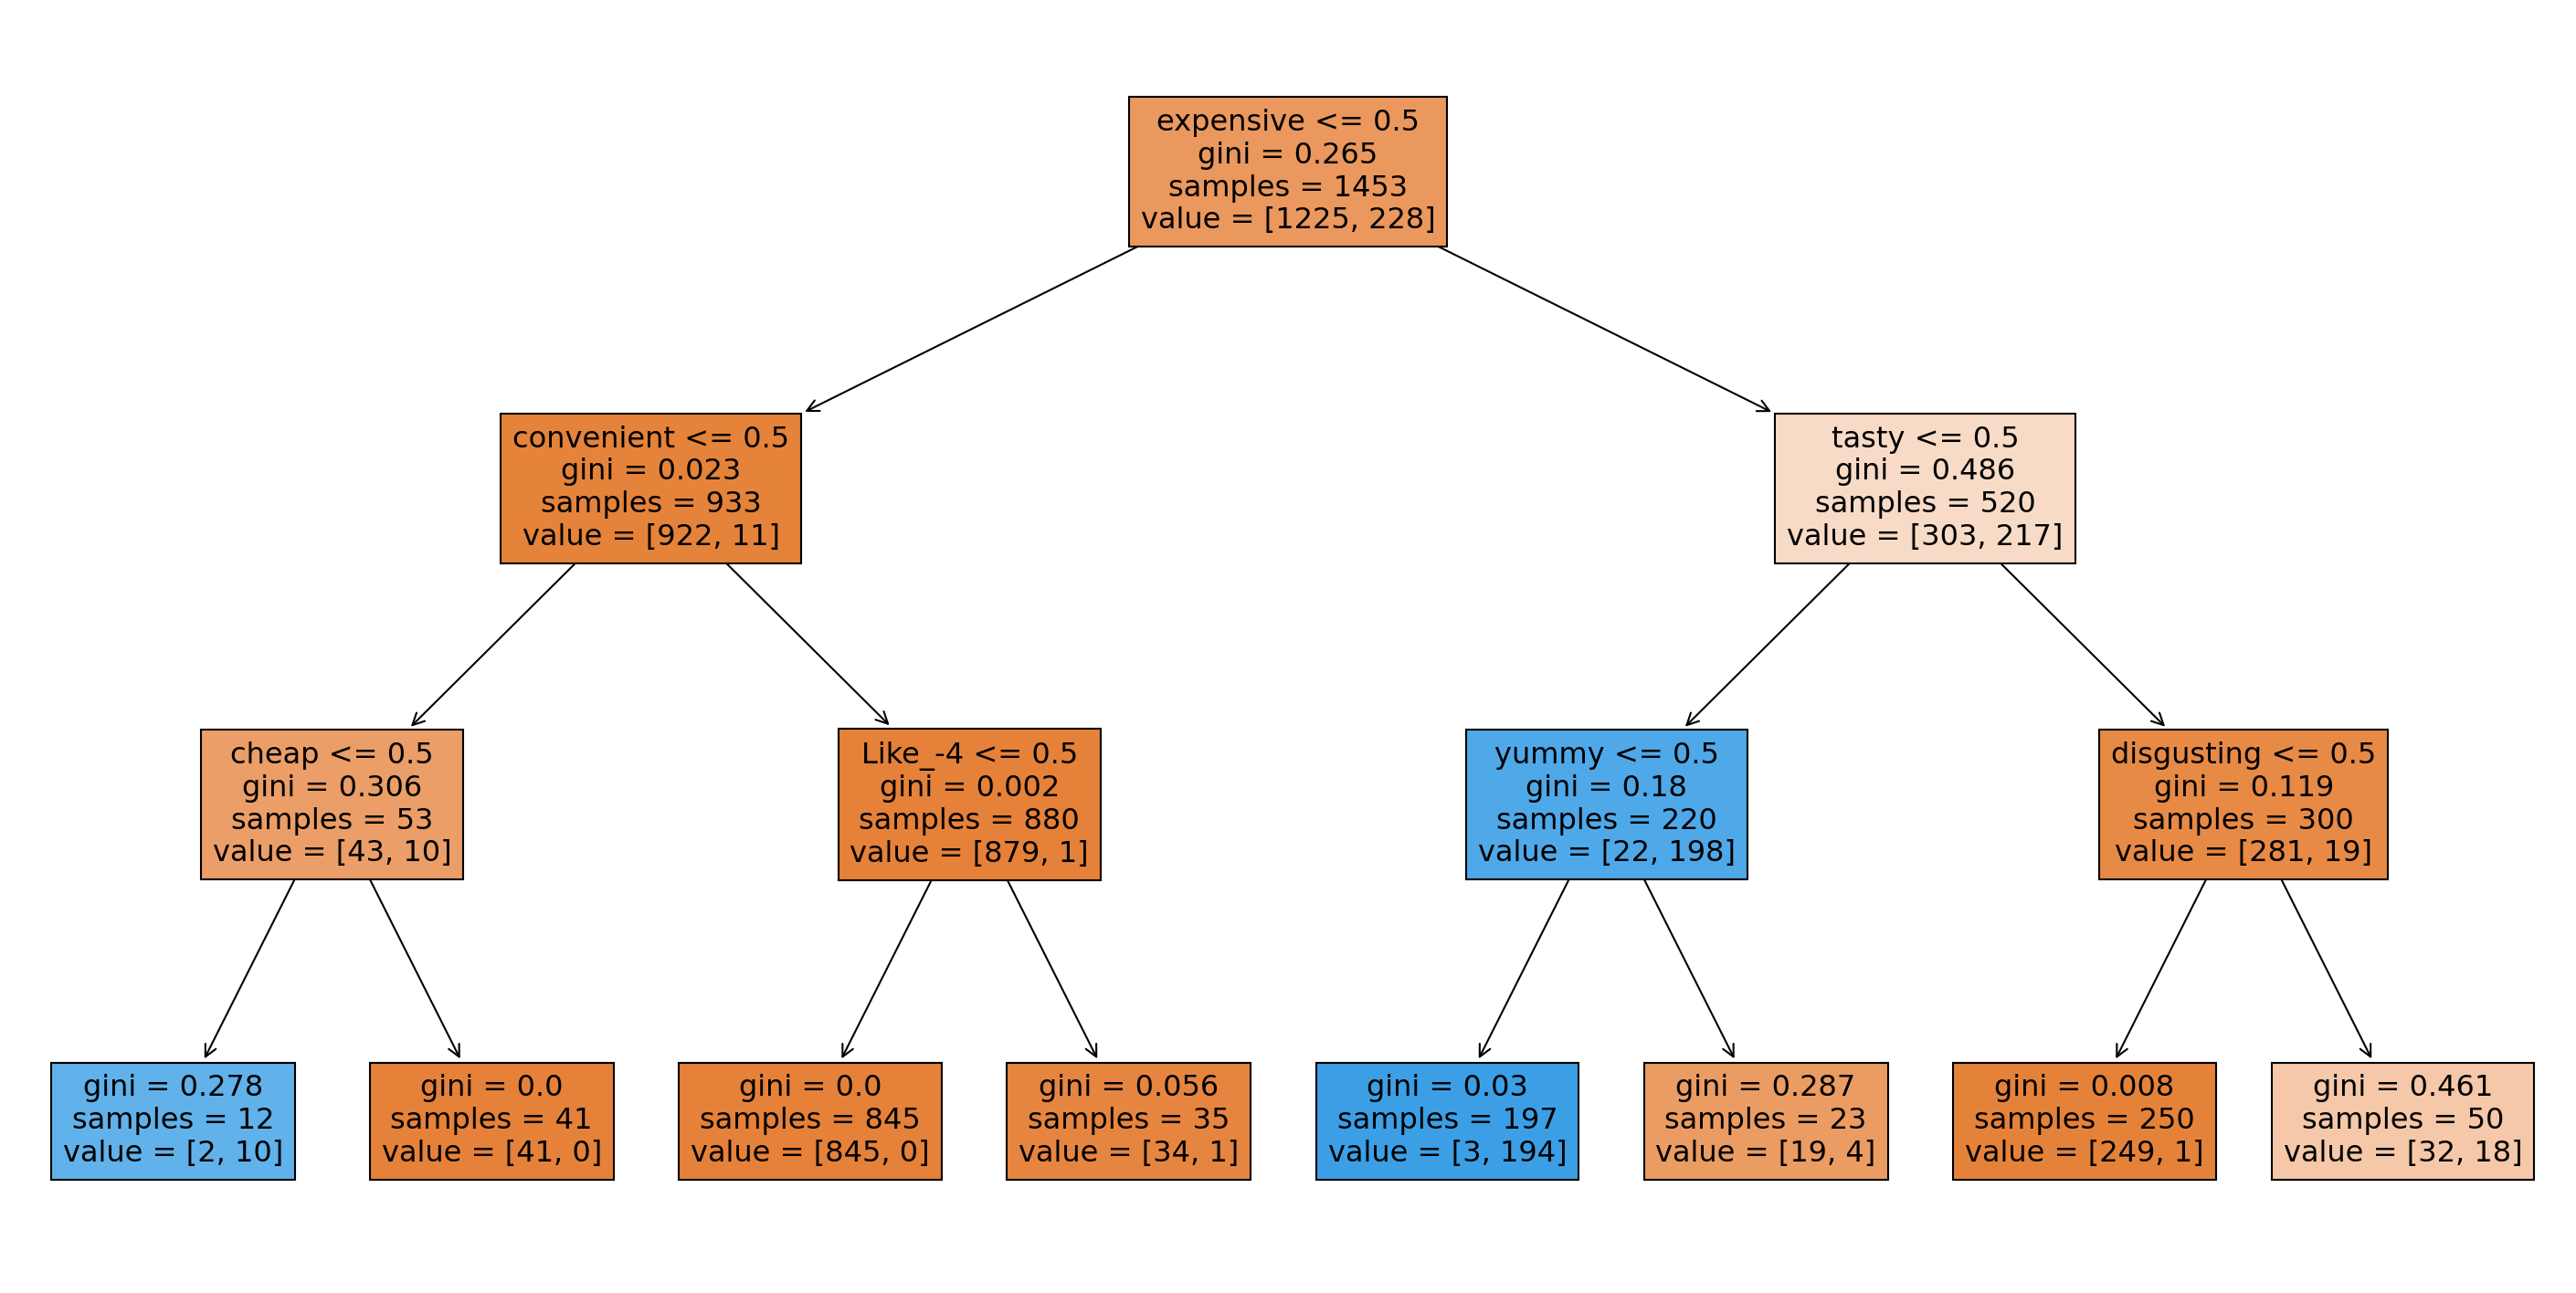

In [95]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=150)
plot_tree(model,filled=True,feature_names=X_train.columns);

In [107]:
MD_x['Like'] = MD_x['Like'].astype(int)

In [108]:
segement_profile = MD_x.groupby("cluster").aggregate('mean')


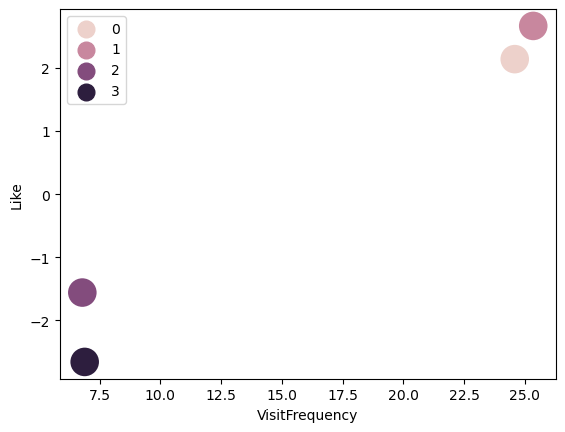

In [109]:
sns.scatterplot(y=segement_profile['Like'],x=segement_profile['VisitFrequency'],hue=segement_profile.index,s=500)
plt.legend(markerscale=2)

In [110]:
segement_profile

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Gender,Age,VisitFrequency
cluster,,,,,,,,,,,,,,,
0,0.854489,0.962848,0.133127,0.907121,0.619195,0.860681,0.108359,0.931889,0.897833,0.204334,0.105263,2.139319,0.523220,39.811146,24.585139
1,0.887931,0.981034,0.086207,0.794828,0.329310,0.960345,0.922414,0.975862,0.017241,0.320690,0.043103,2.665517,0.398276,43.470690,25.346552
2,0.024845,0.900621,0.077640,0.928571,0.664596,0.953416,0.878882,0.152174,0.009317,0.068323,0.413043,-1.559006,0.413043,48.990683,6.788820
3,0.017544,0.653509,0.078947,0.907895,0.701754,0.728070,0.074561,0.087719,0.951754,0.065789,0.706140,-2.657895,0.578947,48.087719,6.885965


### Step 9: Customising The Marketing Mix

: Customising the Marketing Mix
In Step 9 the marketing mix is designed. If, for example, McDonald’s managersdecide to focus on segment 3 (young customers who like McDonald’s, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to offer a MCSUPERBUDGET line to cater specifically to the price expectations of this segment (4Ps: Price). The advantage of such an approach might be that members of segment 3 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald’s range of products. To not cannibalise the main range, the product features of the MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). 

Next, communication channels would have to be identified which are heavily used by
members of segment 3 to communicate the availability of the MCSUPERBUDGET line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s
management could consider having a MCSUPERBUDGET lane where the wait in the queue might be slightly longer in an attempt not to cannibalise the main product line

Step 10: Evaluation and Monitoring

After implementing the market segmentation strategy, it’s crucial to evaluate its success and continuously monitor the market. For instance, if Segment 3 members start earning more, the MCSUPERBUDGET line may no longer meet their needs. Additionally, changes in the broader market, such as new competitors, can affect segmentation effectiveness. Ongoing monitoring helps identify such changes and enables McDonald’s management to adjust their marketing strategies accordingly.






